In [1]:
"""
Load packages and data 
"""
import numpy as np
import os
import json
from scipy import special
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read in real data
data_IJ = np.load('/data/projects/dncbtd/methylation/sarcoma/data_top5k.npz')
data_IJ = data_IJ['Beta_IJ']

In [4]:
def compute_sample_divergence_dncbtd(C = 5, K = 5, data_path = 'data/methylation/sarcoma/data_top5k.npz', configs_path = ''):
    """
    Function to compute sample cluster stability for DNCB-TD model.
    """
    #### 1. Read in files
    with open(configs_path) as f:
        configs = json.load(f)
    uuids = [entry['uuid'] for entry in configs if entry.get('C') == C and entry.get('K') == K and entry.get('data_path') == data_path]

    out = []
    for uuid in uuids:
        path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/uuid_{}_state_2000.npz'.format(uuid)
        temp = np.load(path)
        ##### 2. Compute divergence
        dat = temp['Theta_IC']
        ## Compare upper triangle of matrices only
        samps_emp = np.ravel(np.triu(dat @ dat.T))
        samps_true = np.ravel(np.triu(data_IJ @ data_IJ.T))
        KL = special.rel_entr(samps_true, samps_emp).mean()
        out.append(KL)
    return np.mean(out)

def compute_pathway_divergence_dncbtd(C = 5, K = 5, data_path = 'data/methylation/sarcoma/data_top5k.npz', configs_path = ''):
    """
    Function to compute pathway cluster stability for DNCB-TD model.
    """
    #### 1. Read in files
    with open(configs_path) as f:
        configs = json.load(f)
    uuids = [entry['uuid'] for entry in configs if entry.get('C') == C and entry.get('K') == K and entry.get('data_path') == data_path]
    
    out = []
    for uuid in uuids:
        path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/uuid_{}_state_2000.npz'.format(uuid)
        temp = np.load(path)
        ##### 2. Compute divergence
        dat = temp['Phi_KJ'].T
        ## Compare upper triangle of matrices only
        samps_emp = np.ravel(np.triu(dat @ dat.T))
        samps_true = np.ravel(np.triu(data_IJ.T @ data_IJ))
        KL = special.rel_entr(samps_true, samps_emp).mean() 
        out.append(KL)
    return np.mean(out)

In [5]:
dncbtd_clusters20_c2 = []
dncbtd_clusters20_c5 = []
dncbtd_clusters20_c10 = []
dncbtd_clusters20_c15 = []
dncbtd_clusters20_c20 = []


for K in range(2, 21):
    dncbtd_clusters20_c2.append(compute_sample_divergence_dncbtd(C = 2, K = K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_clusters20_c5.append(compute_sample_divergence_dncbtd(C = 5, K = K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_clusters20_c10.append(compute_sample_divergence_dncbtd(C = 10, K = K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_clusters20_c15.append(compute_sample_divergence_dncbtd(C = 15, K = K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_clusters20_c20.append(compute_sample_divergence_dncbtd(C = 20, K = K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))

lowessc2 = sm.nonparametric.lowess(dncbtd_clusters20_c2, range(2, 21), frac=0.4)
lowessc5 = sm.nonparametric.lowess(dncbtd_clusters20_c5[3:], range(5, 21), frac=0.35)
lowessc10 = sm.nonparametric.lowess(dncbtd_clusters20_c10[8:], range(10, 21), frac=0.4)
lowessc15 = sm.nonparametric.lowess(dncbtd_clusters20_c15[13:], range(15, 21), frac=0.4)

In [6]:
dncbtd_pathways20_k5 = []
dncbtd_pathways20_k10 = []
dncbtd_pathways20_k15 = []
dncbtd_pathways20_k20 = []

for C in range(2, 21):
    dncbtd_pathways20_k5.append(compute_pathway_divergence_dncbtd(C = C, K = 5, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_pathways20_k10.append(compute_pathway_divergence_dncbtd(C = C, K = 10, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_pathways20_k15.append(compute_pathway_divergence_dncbtd(C = C, K = 15, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))
    dncbtd_pathways20_k20.append(compute_pathway_divergence_dncbtd(C = C, K = 20, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment/stability_experiment_config.json'))

lowessk5 = sm.nonparametric.lowess(dncbtd_pathways20_k5[:4], range(2, 6), frac=0.4)
lowessk10 = sm.nonparametric.lowess(dncbtd_pathways20_k10[:9], range(2, 11), frac=0.4)
lowessk15 = sm.nonparametric.lowess(dncbtd_pathways20_k15[:14], range(2, 16), frac=0.4)
lowessk20 = sm.nonparametric.lowess(dncbtd_pathways20_k20, range(2, 21), frac=0.4)

In [7]:
def compute_sample_divergence_bgnmf(K = 5, data_path = 'data/methylation/sarcoma/data_top5k.npz', configs_path = ''):
    """
    Function to compute sample cluster stability for BGNMF model.
    """
    #### 1. Read in files
    with open(configs_path) as f:
        configs = json.load(f)
    out = []
    uuids = [entry['uuid'] for entry in configs if entry.get('K') == K and entry.get('data_path') == data_path]
    for uuid in uuids:
        path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_bgnmf/uuid_{}_state_bgnmf.npz'.format(uuid)
        temp = np.load(path)
        ##### 2. Compute divergence
        A_IK, B_IK = temp['A_IK'], temp['B_IK']
        X = np.divide(A_IK, (A_IK + B_IK)) # Create pseudo samples x clusters matrix
        samps_emp = np.ravel(np.triu(X @ X.T)) 
        samps_true = np.ravel(np.triu(data_IJ @ data_IJ.T))
        KL = special.rel_entr(samps_true, samps_emp).mean() 
        out.append(KL)
    return np.mean(out)

def compute_pathway_divergence_bgnmf(K = 5, data_path = 'data/methylation/sarcoma/data_top5k.npz', configs_path = ''):
    """
    Function to compute feature cluster stability for BGNMF model.
    """
    #### 1. Read in files
    with open(configs_path) as f:
        configs = json.load(f)
    out = []
    uuids = [entry['uuid'] for entry in configs if entry.get('K') == K and entry.get('data_path') == data_path]
    for uuid in uuids:
        path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_bgnmf/uuid_{}_state_bgnmf.npz'.format(uuid)
        temp = np.load(path)
        ##### 2. Compute divergence
        A_IK, B_IK = temp['A_IK'], temp['B_IK']
        X = np.divide(A_IK, (A_IK + B_IK)) # Create pseudo samples x clusters matrix
        samps_emp = np.ravel(np.triu(X @ X.T)) ## 
        samps_true = np.ravel(np.triu(data_IJ @ data_IJ.T))
        KL = special.rel_entr(samps_true, samps_emp).mean() 
        out.append(KL)
    return np.mean(out)

In [8]:
bgnmf_clusters20 = []
for K in range(2, 21):
    bgnmf_clusters20.append(compute_sample_divergence_bgnmf(K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_bgnmf/stability_experiment_bgnmf_config.json'))
bgnmf_pathways20 = []
for K in range(2, 21):
    bgnmf_pathways20.append(compute_pathway_divergence_bgnmf(K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_bgnmf/stability_experiment_bgnmf_config.json'))

lowessbgnmf_c = sm.nonparametric.lowess(bgnmf_clusters20, range(2, 21), frac=0.5)
lowessbgnmf_p = sm.nonparametric.lowess(bgnmf_pathways20, range(2, 21), frac=0.5)

In [9]:
def compute_sample_divergence_dncbmf(K = 5, data_path = 'data/methylation/sarcoma/data_top5k.npz', configs_path = ''):
    """
    Function to compute sample cluster stability for DNCB-MF model.
    """
    #### 1. Read in files
    with open(configs_path) as f:
        configs = json.load(f)
    out = []
    uuids = [entry['uuid'] for entry in configs if entry.get('K') == K and entry.get('data_path') == data_path]
    for uuid in uuids:
        path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_prbgnmf/uuid_{}_state_2000.npz'.format(uuid)
        temp = np.load(path)
        ##### 2. Compute divergence
        A_IK, B_IK = temp['A_IK'], temp['B_IK']
        X = np.divide(A_IK, (A_IK + B_IK)) # Create pseudo samples x clusters matrix
        samps_emp = np.ravel(np.triu(X @ X.T)) ## 
        samps_true = np.ravel(np.triu(data_IJ @ data_IJ.T))
        KL = special.rel_entr(samps_true, samps_emp).mean() 
        out.append(KL)
    return np.mean(out)

def compute_pathway_divergence_dncbmf(K = 5, data_path = 'data/methylation/sarcoma/data_top5k.npz', configs_path = ''):
    """
    Function to compute feature cluster stability for DNCB-MF model.
    """
    #### 1. Read in files
    with open(configs_path) as f:
        configs = json.load(f)
    out = []
    uuids = [entry['uuid'] for entry in configs if entry.get('K') == K and entry.get('data_path') == data_path]
    for uuid in uuids:
        path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_prbgnmf/uuid_{}_state_2000.npz'.format(uuid)
        temp = np.load(path)
        ##### 2. Compute divergence
        A_IK, B_IK = temp['A_IK'], temp['B_IK']
        X = np.divide(A_IK, (A_IK + B_IK)) # Create pseudo samples x clusters matrix
        samps_emp = np.ravel(np.triu(X @ X.T)) ## 
        samps_true = np.ravel(np.triu(data_IJ @ data_IJ.T))
        KL = special.rel_entr(samps_true, samps_emp).mean() 
        out.append(KL)
    return np.mean(out)

In [10]:
dncbmf_clusters20 = []
for K in range(2, 21):
    dncbmf_clusters20.append(compute_sample_divergence_dncbmf(K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_prbgnmf/stability_experiment_prbgnmf_config.json'))
dncbmf_pathways20 = []
for K in range(2, 21):
    dncbmf_pathways20.append(compute_pathway_divergence_dncbmf(K, configs_path = '/home/gnagulpally/dncb-refactor/results/stability_experiment_prbgnmf/stability_experiment_prbgnmf_config.json'))

lowessdncbmf_c = sm.nonparametric.lowess(dncbmf_clusters20, range(2, 21), frac=0.5)
lowessdncbmf_p = sm.nonparametric.lowess(dncbmf_pathways20, range(2, 21), frac=0.5)

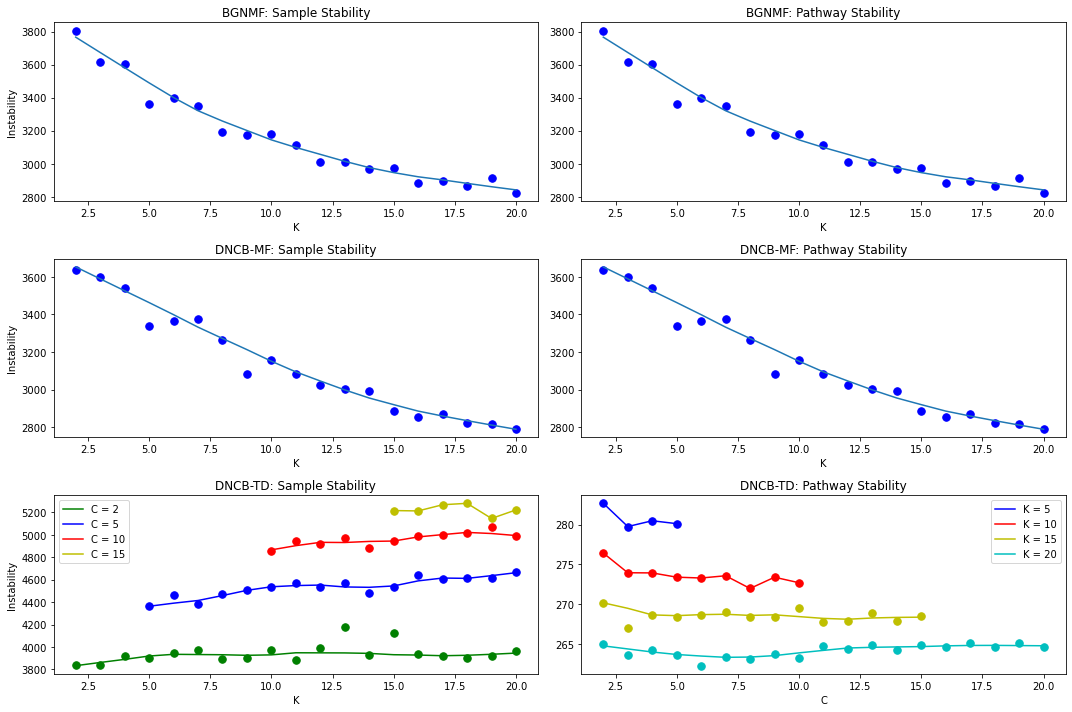

In [11]:
## Create figure
fig, axs = plt.subplots(3,2, figsize=(15,10))
axs[2,0].plot(range(2, 21), dncbtd_clusters20_c2, 'g.', markersize = 15)
axs[2,0].plot(lowessc2[:, 0], lowessc2[:, 1], 'g', label = 'C = 2')
axs[2,0].plot(range(5, 21), dncbtd_clusters20_c5[3:], 'b.', markersize = 15)
axs[2,0].plot(lowessc5[:, 0], lowessc5[:, 1], 'b', label = 'C = 5')
axs[2,0].plot(range(10, 21), dncbtd_clusters20_c10[8:], 'r.', markersize = 15)
axs[2,0].plot(lowessc10[:, 0], lowessc10[:, 1], 'r', label = 'C = 10')
axs[2,0].plot(range(15, 21), dncbtd_clusters20_c15[13:], 'y.', markersize = 15)
axs[2,0].plot(lowessc15[:, 0], lowessc15[:, 1], 'y', label = 'C = 15')
axs[2,0].legend(loc = "upper left")
axs[2,0].set_xlabel('K')
axs[2,0].set_title('DNCB-TD: Sample Stability')
axs[2,0].set_ylabel('Instability')

axs[2,1].plot(range(2, 6), dncbtd_pathways20_k5[:4], 'b.', markersize = 15)
axs[2,1].plot(lowessk5[:, 0], lowessk5[:, 1], 'b', label = 'K = 5')
axs[2,1].plot(range(2, 11), dncbtd_pathways20_k10[:9], 'r.', markersize = 15)
axs[2,1].plot(lowessk10[:, 0], lowessk10[:, 1], 'r', label = 'K = 10')
axs[2,1].plot(range(2, 16), dncbtd_pathways20_k15[:14], 'y.', markersize = 15)
axs[2,1].plot(lowessk15[:, 0], lowessk15[:, 1], 'y', label = 'K = 15')
axs[2,1].plot(range(2, 21), dncbtd_pathways20_k20, 'c.', markersize = 15)
axs[2,1].plot(lowessk20[:, 0], lowessk20[:, 1], 'c', label = 'K = 20')
axs[2,1].legend(loc = "upper right")
axs[2,1].set_xlabel('C')
axs[2,1].set_title('DNCB-TD: Pathway Stability')

axs[1, 0].plot(range(2, 21), dncbmf_clusters20, 'b.', markersize = 15)
axs[1, 0].plot(lowessdncbmf_c[:, 0], lowessdncbmf_c[:, 1])
axs[1, 0].set_title('DNCB-MF: Sample Stability')
axs[1, 0].set_xlabel('K')
axs[1, 0].set_ylabel('Instability')
axs[1, 1].plot(range(2, 21), dncbmf_pathways20, 'b.', markersize = 15)
axs[1, 1].plot(lowessdncbmf_p[:, 0], lowessdncbmf_p[:, 1])
axs[1, 1].set_title('DNCB-MF: Pathway Stability')
axs[1, 1].set_xlabel('K')

axs[0, 0].plot(range(2, 21), bgnmf_clusters20, 'b.', markersize = 15)
axs[0, 0].plot(lowessbgnmf_c[:, 0], lowessbgnmf_c[:, 1])
axs[0, 0].set_title('BGNMF: Sample Stability')
axs[0, 0].set_xlabel('K')
axs[0,0].set_ylabel('Instability')

axs[0, 1].plot(range(2, 21), bgnmf_pathways20, 'b.', markersize = 15)
axs[0, 1].plot(lowessbgnmf_p[:, 0], lowessbgnmf_p[:, 1])
axs[0, 1].set_title('BGNMF: Pathway Stability')
axs[0, 1].set_xlabel('K')

plt.tight_layout()
plt.savefig('figures/stability_figure.pdf')